In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
# Specify the path to your CSV file
standard_data_path= '/content/drive/My Drive/Semester 7/machine learning/lab_1/train.csv'
csv_path_of_test_data='/content/drive/My Drive/Semester 7/machine learning/lab_1/valid.csv'
# Read the CSV file using pandas
standard_data = pd.read_csv(standard_data_path)
test_data=pd.read_csv(csv_path_of_test_data)
# Display the first few rows of the DataFrame
standard_data.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [ ]:
standard_data.shape
standard_data.drop(columns=["label_2","label_3","label_4"],axis=1,inplace=True)
test_data.drop(columns=["label_2","label_3","label_4"],axis=1,inplace=True)
standard_data
test_data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-1.061046,0.382224,0.076990,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,0.120304,-0.066218,-0.231481,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,-1.166126,-1.299070,-2.486144,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-1.663985,-0.865878,-1.387906,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,0.061812,-0.368456,0.344975,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.138455,-0.054473,-2.217166,2.435297,0.577077,0.261289,-0.008198,-0.882623,0.483588,-1.211132,...,1.323379,0.360817,-1.465830,-1.010199,0.576673,2.565527,-0.219125,2.074768,-1.084553,39
746,0.119553,-0.997402,-0.255938,-1.308236,-0.238078,-0.284949,-0.221219,0.168704,1.436056,-2.424829,...,-0.542999,1.035526,0.772775,-1.388709,0.921499,1.170212,-3.902254,1.126500,0.493273,39
747,-0.088334,-0.213448,-2.120592,2.273464,0.309885,0.207395,1.146165,0.086091,-0.280434,-1.237552,...,0.519650,0.501760,-0.778551,0.166359,0.866489,2.245614,-1.452705,1.080915,-1.439653,39
748,0.313892,0.132357,-1.009433,1.449428,1.410069,-0.463935,1.024404,0.923232,2.197572,-1.698491,...,-0.560037,0.060962,-1.664005,0.788151,-1.599615,2.193537,0.049167,1.454862,-2.953291,39


In [ ]:
x=standard_data.iloc[:,:256]
y=standard_data.iloc[:,256:257]

x_test=test_data.iloc[:,:256]
y_test=test_data.iloc[:,256:257]
print(x_test.shape,y_test.shape)
print(x.columns.tolist())

(750, 256) (750, 1)
['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_70', 'feature

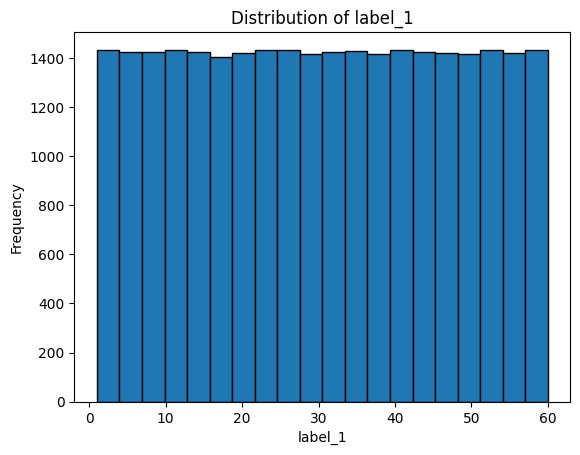

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate label correlations
column_to_visualize = 'label_1'

# Create a histogram
plt.hist(y[column_to_visualize], bins=20, edgecolor='k')
plt.xlabel(column_to_visualize)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_to_visualize}')
plt.show()

frequency_counts = y['label_1'].value_counts()

In [ ]:
#use knn without preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import hamming_loss, jaccard_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x, y)

# Make predictions on the test set
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.988
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        18
           6       0.90      1.00      0.95         9
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        11
          10       0.89      1.00      0.94         8
          11       0.95      1.00      0.97        19
          12       1.00      1.00      1.00         7
          13       0.92      1.00      0.96        11
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       0.93      1.00      0.97        14
          17       1.00      1.00      1.00        14
          18       1.

scalling the x data set

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
#  convert X_scaled back to a pandas DataFrame
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled_df

scaler=StandardScaler()
x_test_scaled=scaler.fit_transform(x_test)
#  convert X_scaled back to a pandas DataFrame
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x.columns)
x_test_scaled_df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-0.980619,-0.400724,1.516652,1.895753,1.158038,-0.781455,-0.301012,-1.994870,2.051901,0.092338,...,2.944678,-0.454183,-0.245629,0.991436,-0.676299,-1.394317,-1.649434,-1.669590,-0.636488,1.302123
1,-1.215399,-0.381678,1.235221,1.988147,0.310189,-0.839579,-0.587556,-2.821923,0.361000,-0.188731,...,1.382270,0.671889,-0.718569,0.733561,-1.349653,-0.990484,-0.689093,-0.765148,-0.489859,0.674692
2,1.156817,-2.048879,-0.025642,2.147995,-1.308396,1.865987,-0.404626,-0.013746,1.216970,0.607268,...,3.025099,-0.554346,-2.018770,-1.151290,1.246950,-0.269159,-0.888729,-0.421656,-0.051262,1.024658
3,-1.372028,-0.492568,0.600223,2.213949,0.059405,1.521014,1.202571,-1.422214,0.173760,-0.553975,...,0.180355,-1.028910,-1.561913,-0.233186,-0.620680,0.405418,-0.763245,-1.155916,0.829052,0.243209
4,1.218136,-0.122503,0.265542,1.044141,2.091645,-0.497569,-0.268918,-0.962354,2.062298,0.561275,...,-0.116433,0.616134,-1.037318,1.215466,-0.621719,-0.675270,-2.222758,-0.351210,1.510517,0.966157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.370871,0.549994,-1.707008,1.655382,0.472535,0.480413,0.231105,-1.540575,-0.463470,0.863141,...,0.253065,1.818671,-0.268206,-0.298329,-0.971424,0.205263,0.932707,1.205202,1.378679,0.380883
746,0.351092,-0.361389,0.031311,-1.355569,-0.495022,-0.030836,0.007984,-0.561262,0.542425,-0.535781,...,0.064264,0.039623,0.443361,1.573099,-1.355097,0.507464,-0.555439,-2.299754,0.433688,1.625729
747,0.133567,0.396338,-1.621410,1.525219,0.155389,0.429972,1.440210,-0.638217,-1.270349,0.832690,...,0.773049,1.052549,-0.119564,0.276222,0.221183,0.459253,0.591510,0.031297,0.388260,0.100722
748,0.554443,0.730574,-0.636543,0.862440,1.461266,-0.198358,1.312675,0.141582,1.346656,0.301406,...,0.821373,0.023382,-0.584442,-0.463999,0.851456,-1.702002,0.535969,1.460515,0.760915,-1.093481


In [ ]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_scaled_df)
train_features=x_scaled_df
train_labels=y
test_features=x_test_scaled_df
test_labels=y_test

In [ ]:
len(train_features.columns[constant_filter.get_support()])

256

In [ ]:
constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


In [ ]:
for column in constant_columns:
    print(column)

In [ ]:
train_features = constant_filter.transform(train_features)
test_features = constant_filter.transform(test_features)

train_features.shape, test_features.shape


((28520, 256), (750, 256))

In [ ]:
print(train_features)

[[-1.71948593  0.3230861   1.22626621 ... -0.01710786 -1.00399554
   0.93864007]
 [-1.49785742 -0.39040814  1.08744171 ... -0.38741484  0.93754788
  -0.91934908]
 [-1.69662914  0.2574289  -0.43679429 ...  0.77073599 -1.2943884
  -0.82343943]
 ...
 [ 1.37144383 -0.0161747   0.14601759 ...  1.82766847 -0.32969936
  -0.33633573]
 [-0.77672122 -0.00501108  0.00669597 ... -0.19734001 -1.41482043
  -0.1668873 ]
 [ 1.05748985 -0.27151246  0.59449226 ...  1.64984365 -0.07895752
  -1.67553032]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import hamming_loss, jaccard_score

# Split data into training and testing sets

# X_train, X_test, y_train, y_test = train_test_split(trai_features, y_imputed_label_1, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(train_features, train_labels)

# Make predictions on the test set
y_pred = knn.predict(test_features)
y_pred_before=y_pred


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(test_labels, y_pred))
print(classification_report(test_labels,y_pred))

0.9893333333333333
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9
           3       0.92      1.00      0.96        12
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         8
          11       0.95      1.00      0.97        19
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       0.93      1.00      0.97        14
          17       1.00      1.00      1.00        14
        

there are no fetures that has 0 varience, so any fetures not removed.then try to remove Quasi-constant features

In [ ]:
qconstant_filter = VarianceThreshold(threshold=0.01)
qconstant_filter.fit(train_features)
train_features= pd.DataFrame(train_features, columns=x.columns)
test_features=pd.DataFrame(test_features, columns=x.columns)

In [ ]:
len(train_features.columns[qconstant_filter.get_support()])

256

In [ ]:
qconstant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))

0


there are no qusai- features, so then try to remove duplicate features

In [ ]:

train_features_T = train_features.T
train_features_T.shape
print(train_features_T.duplicated().sum())

0


No duplicate features area found

try to remove correlated features

In [ ]:
correlated_features = set()
correlation_matrix =x.corr()

In [ ]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.4:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
len(correlated_features)

181

In [ ]:
print(correlated_features)


{'feature_100', 'feature_152', 'feature_124', 'feature_103', 'feature_241', 'feature_155', 'feature_201', 'feature_111', 'feature_81', 'feature_163', 'feature_234', 'feature_239', 'feature_191', 'feature_196', 'feature_190', 'feature_84', 'feature_256', 'feature_48', 'feature_216', 'feature_120', 'feature_43', 'feature_98', 'feature_180', 'feature_142', 'feature_254', 'feature_232', 'feature_250', 'feature_219', 'feature_173', 'feature_184', 'feature_166', 'feature_208', 'feature_224', 'feature_212', 'feature_198', 'feature_237', 'feature_178', 'feature_67', 'feature_128', 'feature_106', 'feature_218', 'feature_80', 'feature_230', 'feature_177', 'feature_63', 'feature_162', 'feature_200', 'feature_115', 'feature_151', 'feature_117', 'feature_171', 'feature_193', 'feature_213', 'feature_38', 'feature_95', 'feature_203', 'feature_255', 'feature_122', 'feature_57', 'feature_220', 'feature_134', 'feature_94', 'feature_199', 'feature_49', 'feature_65', 'feature_170', 'feature_179', 'feature

In [ ]:
train_features.drop(columns=correlated_features, axis=1, inplace=True)
test_features.drop(columns=correlated_features, axis=1, inplace=True)
x_scaled_df.drop(columns=correlated_features, axis=1, inplace=True)

In [ ]:
# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(train_features, train_labels)

# Make predictions on the test set
y_pred = knn.predict(test_features)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(accuracy_score(test_labels, y_pred))
print(classification_report(test_labels,y_pred))

0.9786666666666667
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9
           3       0.92      1.00      0.96        12
           4       1.00      1.00      1.00        16
           5       0.95      1.00      0.97        18
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        11
          10       0.80      1.00      0.89         8
          11       0.90      1.00      0.95        19
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       0.93      1.00      0.97        14
          17       1.00      1.00      1.00        14
        

In [ ]:
# feature imporatance method only support for random forest
#  importance=knn.feature_importances_
# train_features_copy = train_features.copy()
# test_features_copy = test_features.copy()
# for i,v in enumerate(importance):
#   if v < 0.004:
#     train_features_copy.drop(columns=train_features.columns[i], inplace=True)
#     test_features_copy.drop(columns=test_features.columns[i], inplace=True)

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(.95, svd_solver='full')
pca=pca.fit(train_features)
train_features_pca=pca.transform(train_features)
test_features_pca=pca.transform(test_features)


In [ ]:
pca.n_components_
train_features_pca.shape

(28520, 45)

In [ ]:

knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(train_features_pca, train_labels)

# Make predictions on the test set
y_pred = knn.predict(test_features_pca)
y_pred_after=y_pred

# print(accuracy_score(test_labels, y_pred))
# print(classification_report(test_labels,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
pca_columns = [f'New_feature_{i+1}' for i in range(train_features_pca.shape[1])]
df_final_Label1 = pd.DataFrame(test_features_pca, columns=pca_columns)
df_final_Label1.insert(0, 'Label_1_predictions_before', y_pred_before)
df_final_Label1.insert(1, 'Label_1_predictions_after',y_pred_after)
df_final_Label1.insert(2,'No of new features', [pca.n_components_ for i in range(len(y_pred_before))])
df_final_Label1.to_csv('190088H_Label_1.csv')